<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('covid1.csv')

print(train.shape)

(568, 4)


In [3]:
train.head()

,Tweet,Tweet Datetime,Twitter Username,Twitter User Location
0,National Drug Authority Approves COVIDEX For T...,2021-06-29 09:25:33,Pernille Bærendtsen,"Copenhagen, Denmark"
1,"region’s most vulnerable, while also paralyzin...",2021-06-29 09:00:07,André Castro,"Bonn, Germany"
2,"#Zambia Bars, taverns and casinos closed as th...",2021-06-29 08:58:39,Africafrique Africanews,Africa
3,Interactive map updated weekly to follow the s...,2021-06-29 07:45:06,The Africa Report,"Paris, France"
4,Coronavirus - South Africa: COVID-19 Statistic...,2021-06-28 19:29:06,APO Group English,#AFRICA #MENA


In [4]:
import re
train['Tweet'] = train['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

train.head(10)


,Tweet,Tweet Datetime,Twitter Username,Twitter User Location
0,National Drug Authority Approves COVIDEX For T...,2021-06-29 09:25:33,Pernille Bærendtsen,"Copenhagen, Denmark"
1,"region’s most vulnerable, while also paralyzin...",2021-06-29 09:00:07,André Castro,"Bonn, Germany"
2,"#Zambia Bars, taverns and casinos closed as th...",2021-06-29 08:58:39,Africafrique Africanews,Africa
3,Interactive map updated weekly to follow the s...,2021-06-29 07:45:06,The Africa Report,"Paris, France"
4,Coronavirus - South Africa: COVID-19 Statistic...,2021-06-28 19:29:06,APO Group English,#AFRICA #MENA
5,Coronavirus - Malawi: COVID-19 Daily Info Upda...,2021-06-28 18:36:59,APO Group English,#AFRICA #MENA
6,Coronavirus - Malawi: COVID-19 Daily Info Upda...,2021-06-28 18:34:34,APO Group English,#AFRICA #MENA
7,At least 14 countries in #Africa have used up ...,2021-06-28 18:21:00,The New Humanitarian,NaN
8,Scaling up active surveillance for COVID-19 an...,2021-06-28 13:03:33,APO Group English,#AFRICA #MENA
9,Passengers from the Southern African region no...,2021-06-28 12:23:04,Newsfirst.lk Sri Lanka,"Colombo, Sri Lanka"


In [5]:
# adding a column to represent the length of the tweet

train['len'] = train['Tweet'].str.len()


train.head(10)

,Tweet,Tweet Datetime,Twitter Username,Twitter User Location,len
0,National Drug Authority Approves COVIDEX For T...,2021-06-29 09:25:33,Pernille Bærendtsen,"Copenhagen, Denmark",55
1,"region’s most vulnerable, while also paralyzin...",2021-06-29 09:00:07,André Castro,"Bonn, Germany",117
2,"#Zambia Bars, taverns and casinos closed as th...",2021-06-29 08:58:39,Africafrique Africanews,Africa,111
3,Interactive map updated weekly to follow the s...,2021-06-29 07:45:06,The Africa Report,"Paris, France",85
4,Coronavirus - South Africa: COVID-19 Statistic...,2021-06-28 19:29:06,APO Group English,#AFRICA #MENA,110
5,Coronavirus - Malawi: COVID-19 Daily Info Upda...,2021-06-28 18:36:59,APO Group English,#AFRICA #MENA,104
6,Coronavirus - Malawi: COVID-19 Daily Info Upda...,2021-06-28 18:34:34,APO Group English,#AFRICA #MENA,104
7,At least 14 countries in #Africa have used up ...,2021-06-28 18:21:00,The New Humanitarian,NaN,117
8,Scaling up active surveillance for COVID-19 an...,2021-06-28 13:03:33,APO Group English,#AFRICA #MENA,114
9,Passengers from the Southern African region no...,2021-06-28 12:23:04,Newsfirst.lk Sri Lanka,"Colombo, Sri Lanka",95


In [6]:
train.groupby('Twitter User Location').describe()

len                                       \
                             count        mean        std    min    25%   
Twitter User Location                                                     
#AFRICA #MENA                117.0  108.538462   7.529870   75.0  106.0   
Africa                         4.0  111.000000   0.000000  111.0  111.0   
Africa 🌍                       4.0  116.000000   0.000000  116.0  116.0   
Al Hilal - C Ring Road         4.0  117.000000   0.000000  117.0  117.0   
Antwerp, #Brussels-Belgium.    2.0   97.000000   0.000000   97.0   97.0   
...                            ...         ...        ...    ...    ...   
Vishakhapatnam, India          4.0   34.000000   0.000000   34.0   34.0   
Washington DC                  2.0  117.000000   0.000000  117.0  117.0   
Washington, DC                14.0   87.857143  30.112244   26.0   63.0   
Web                            4.0   89.000000   0.000000   89.0   89.0   
archewell.com                  2.0   47.000000   0.000000   47.0   47.0   

                                                   
                               50%     75%    max  
Twitter User Location                              
#AFRICA #MENA                111.0  112.00  116.0  
Africa                       111.0  111.00  111.0  
Africa 🌍                     116.0  116.00  116.0  
Al Hilal - C Ring Road       117.0  117.00  117.0  
Antwerp, #Brussels-Belgium.   97.0   97.00   97.0  
...                            ...     ...    ...  
Vishakhapatnam, India         34.0   34.00   34.0  
Washington DC                117.0  117.00  117.0  
Washington, DC               106.0  114.25  117.0  
Web                           89.0   89.00   89.0  
archewell.com                 47.0   47.00   47.0  

[66 rows x 8 columns]

In [7]:
print('Number of lines before removing empty tweets: {0}'.format(train.shape[0]))

train = train[train['Tweet'].notnull()].reset_index()
train.drop(columns=['index'], inplace=True)
print('Number of lines after removing empty tweets: {0}'.format(train.shape[0]))

Number of lines before removing empty tweets: 568
Number of lines after removing empty tweets: 568


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\#\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
train_corpus = []

for i in range(0, 568):
  review = re.sub('[^a-zA-Z]', ' ', train['Tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)





# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)


# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\#\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(568, 563)
(568,)
(426, 563)
(142, 563)
(426,)
(142,)


In [10]:
def remove_punct_and_stopwords(text: str, stopwordlist: list, num_list: list) -> str:
    """
    Given text, remove stopwords and punctuation from the string and convert
    all characters to lowercase.
    
    Args:
    ----
    text : str
            Input text for cleaning.
    stopwordlist: list
            List of stopwords to be removed from the string.
    num_list: list
            List of number to be removed from the string.
    
    Returns:
    -------
    text: str
        The input string as lowercase, clean from stopwords/punctuation/numbers
    """

    tknzr = TweetTokenizer()
    try:
        txt_tokenized = tknzr.tokenize(text)
        text = ' '.join([char.lower() for char in txt_tokenized if char.lower() 
                         not in string.punctuation and char.lower() not in
                         stopwordlist and char not in num_list])
    except TypeError:
       pass
   
    return text

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
stopwords_full = list(stopwords.words('english'))
spanish_stopwords = list(stopwords.words('spanish'))

# Remove common words or punctuation used in tweets plus the term that we used for the query
commonTwitterStopwords = ['rt', 'RT', 'retweet', 'new', 'via', 'us', 'u', 'covid', 'coronavirus', '2019', 'coronavírus',
                          '#coronavirus', '#pandemic', '#Health', '#participants', '#health',
                           '#africa','#covid19','#vaccine', '#oxford', '2021', 'june' , '#', '#investment',
                          '19', '#covid', '#Africa',  '#COVID19', '#covid19', '#covid2019', '…', '...', '“', '”', '‘', '’']

stopwords_full.extend(commonTwitterStopwords + spanish_stopwords)
num_list = '0123456789'

In [12]:
import string
train['Tweets_Clean'] = train['Tweet'].apply(lambda x: remove_punct_and_stopwords(x, stopwords_full, num_list))
train.head(5)

,Tweet,Tweet Datetime,Twitter Username,Twitter User Location,len,Tweets_Clean
0,National Drug Authority Approves COVIDEX For T...,2021-06-29 09:25:33,Pernille Bærendtsen,"Copenhagen, Denmark",55,national drug authority approves covidex treat...
1,"region’s most vulnerable, while also paralyzin...",2021-06-29 09:00:07,André Castro,"Bonn, Germany",117,region vulnerable also paralyzing #productivit...
2,"#Zambia Bars, taverns and casinos closed as th...",2021-06-29 08:58:39,Africafrique Africanews,Africa,111,#zambia bars taverns casinos closed government...
3,Interactive map updated weekly to follow the s...,2021-06-29 07:45:06,The Africa Report,"Paris, France",85,interactive map updated weekly follow spread a...
4,Coronavirus - South Africa: COVID-19 Statistic...,2021-06-28 19:29:06,APO Group English,#AFRICA #MENA,110,south africa statistics rsa 28 @nicd_sa #south...


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

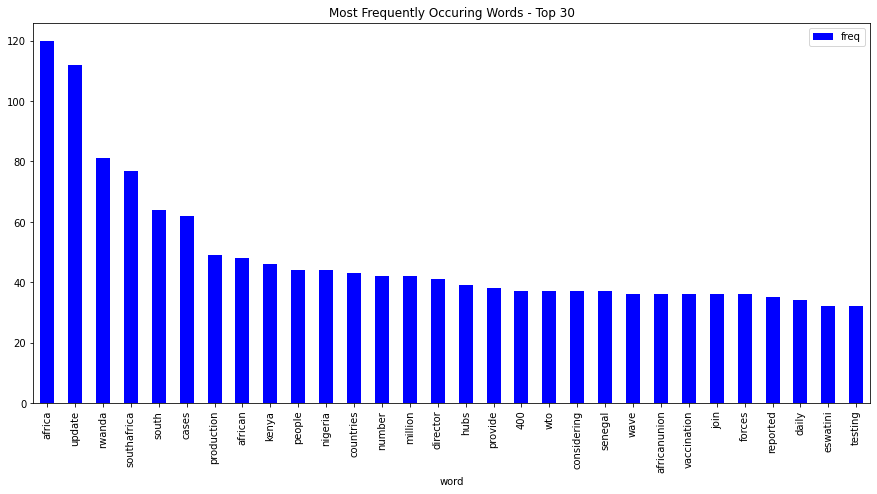

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.Tweets_Clean)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


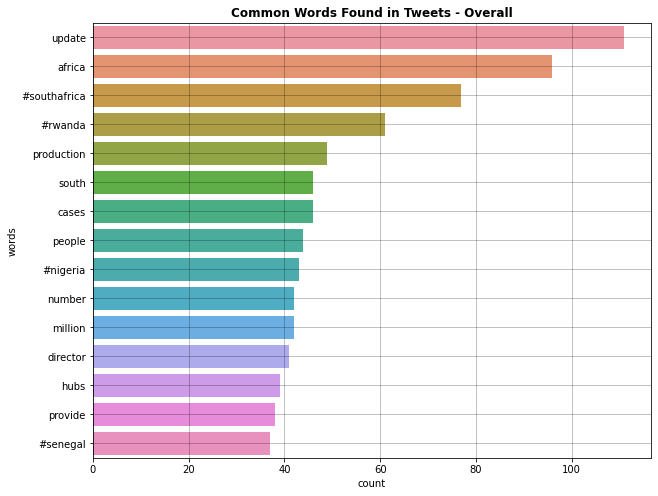

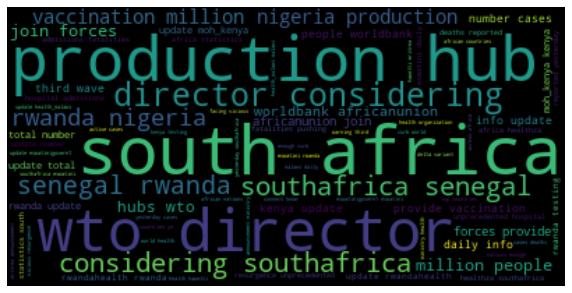

In [14]:
from sentiment_class import TwitterSentiment, month_as_string
tweets_all_months = TwitterSentiment(input_df=train, tweet_column='Tweets_Clean')
tweets_all_months.plot_most_common_words(n_most_common=15, figsize=(10, 8))

tweets_all_months.plot_wordcloud(figsize=(10, 8))

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

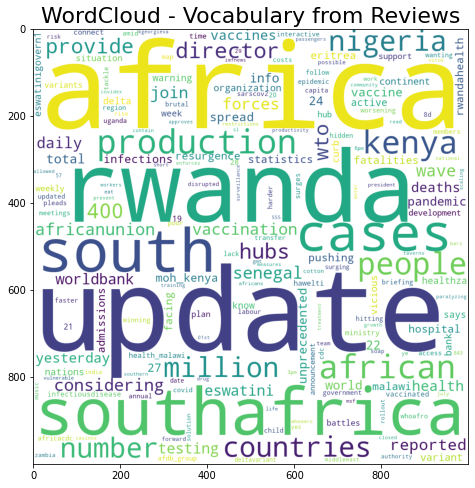

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\#\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


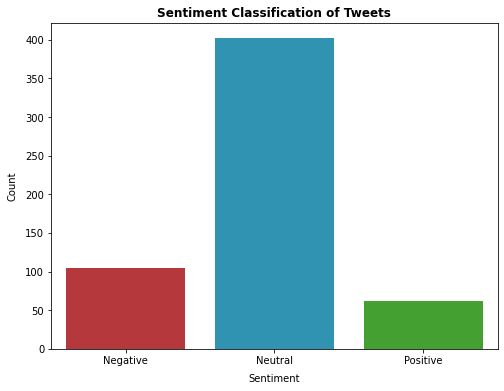

In [16]:
import nltk
nltk.download('opinion_lexicon')
# Overall
tweets_all_months.calculate_sentiment()
tweets_with_sentiment_filename = 'tweets_with_sentiment.csv'
tweets_all_months.df.to_csv(tweets_with_sentiment_filename, sep='\t', encoding='utf-8', index=False)
tweets_w_sentiment = pd.read_csv(tweets_with_sentiment_filename, sep='\t', encoding = 'utf-8', index_col=[0])
tweets_all_months = TwitterSentiment(input_df=tweets_w_sentiment, tweet_column='Tweets_Clean')
tweets_all_months.plot_sentiment(figsize=(8, 6))